Notebook to get and clean the data od Le Temps about the Covid-19 vaccination

In [1]:
from helpers import *

In [20]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
There is no [linux64] chromedriver for browser 96.0.4664 in cache
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45]


In [21]:
def login(): 
    driver.find_element_by_xpath('/html/body/div[1]/header/div[1]/div/div/div/div[3]/ul/li[1]/a').click()
    time.sleep(1)
    driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[1]/input').send_keys(email)
    driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[2]/input').send_keys(password)
    time.sleep(1)
    driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[3]/input').click()

In [58]:
def get_links_le_temps(search_URL): 
    list_links=[]
    driver.get(search_URL)
    while True: 
        links = driver.find_elements_by_xpath('//h3/a')
        for i in links: 
            list_links.append(i.get_attribute('href'))
        try :
            next = driver.find_element_by_xpath('//a[@rel="next"]')
            next.click()
            time.sleep(0.5)
        except :
            print("No more pages left")
            break
    return list_links

In [31]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u200b', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [64]:
def get_html_le_temps(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LE_TEMPS/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

## LE TEMPS

In [3]:
search_url='https://www.letemps.ch/dossiers/covid19-defi-vaccination'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# driver.find_element_by_id('didomi-notice-agree-button').click()

NameError: name 'driver' is not defined

In [24]:
login()

In [11]:
# search_url='https://www.letemps.ch/dossiers/covid19-defi-vaccination'
# list_links_vaccination_section= get_links_le_temps(search_url)

No more pages left


In [12]:
# articles_vactination_section = get_articles_le_temps(list_links_vaccination_section)

In [13]:
# articles_vactination_section = pd.DataFrame.from_dict(articles_vactination_section)


In [69]:
# Mot clé vaccination -->url 2021
url='https://www.letemps.ch/search?keywords=vaccine%20&section=All&sort_by=search_api_relevance&sort_order=DESC&f%5B0%5D=year%3A2021'
list_links_vaccine_2021= get_links_le_temps(url)

No more pages left


In [70]:

# Store the list in a document
with open("list_links_vaccine_2021_le_temps.txt", 'w') as f:
    for s in list_links_vaccine_2021:
        f.write(str(s) + '\n')


In [65]:
url='https://www.letemps.ch/search?keywords=vaccine&section=All&sort_by=search_api_relevance&sort_order=DESC&f%5B0%5D=year%3A2020'
list_links_vaccine_2020 = get_links_le_temps(url)

No more pages left


In [67]:
# Store the list in a document
with open("list_links_vaccine_2020_le_temps.txt", 'w') as f:
    for s in list_links_vaccine_2020:
        f.write(str(s) + '\n')


In [78]:
with open("list_links_vaccine_2020_le_temps.txt", 'r') as f:
    list_links_vaccine_2020 = [line.rstrip('\n') for line in f]

In [79]:

len(list_links_vaccine_2021), len(list_links_vaccine_2020)

(1972, 760)

In [83]:
#CONCATENATE BOTH LISTS AND DROP DUPLICATES
list_links_vaccine_2020.extend(list_links_vaccine_2021)
list_le_temps=list(set(list_links_vaccine_2020))
len(list_le_temps)

2729

In [84]:
get_html_le_temps(list_le_temps)

In [3]:
import os
list_articles_temps=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LE_TEMPS/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LE_TEMPS/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='author-profile').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="lead").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_="date").text.strip()
    except: 
        date="error"
    tweets = soup.findAll('div', class_="article-media twitter")
    for tweet in tweets:
        tweet.decompose()
    try:
       
        tf=soup.find("span",class_="link-wrapper-hovercard").decompose()
        tf=soup.find(class_="body_content").find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text= "error"
    list_articles_temps.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
articles_le_temps_all = pd.DataFrame.from_dict(list_articles_temps)

In [5]:
articles_le_temps_all[articles_le_temps_all['Text'].str.contains("pic.t")]


,Title,Subheadline,Text,Authors,Date,Link
2142,"Plus 17 000 nouveaux cas en trois jours, Alain...",La Suisse compte lundi 17 440 cas supplémentai...,L’augmentation rapide du nombre de cas se pour...,Le Temps avec les agences,Publié lundi 26 octobre 2020 à 15:24\n\t\t ...,https://www.letemps.ch/monde/plus-17-000-nouve...


## CLEAN  DATAFRAME 

In [6]:
articles_le_temps_all

,Title,Subheadline,Text,Authors,Date,Link
0,L’Union européenne prudente sur la Russie et l...,"Réunis en visioconférence jeudi soir, les diri...",Diplomatie des petits pas… ou procrastination?...,"Solenn Paulic, Bruxelles",Publié vendredi 26 mars 2021 à 18:59\n\t\t ...,https://www.letemps.ch/monde/lunion-europeenne...
1,"Vaccins : un peu de gratitude, s’il vous plaît !",error,error,error,error,https://blogs.letemps.ch/christian-jacot-desco...
2,Quatre vaccins «Made in France» en sous-traita...,La France annonce la fabrication de quatre vac...,error,Le Temps avec les agences,Publié lundi 5 avril 2021 à 09:42\n\t\t Mod...,https://www.letemps.ch/monde/quatre-vaccins-ma...
3,Le G7 et la crise: pourquoi si tard? Et le G20?,OPINION. Si les Etats-Unis ne mettent pas à di...,La mondialisation est mise en cause par la pan...,François Nordmann,Publié mardi 17 mars 2020 à 10:02\n\t\t Mod...,https://www.letemps.ch/opinions/g7-crise-tard-g20
4,Un fonds contre le coronavirus lancé via Genève,Une fondation genevoise recevra des dons pour ...,L’Organisation mondiale de la santé (OMS) a ch...,Sébastien Ruche,Publié lundi 23 mars 2020 à 19:20\n\t\t Mod...,https://www.letemps.ch/economie/un-fonds-contr...
...,...,...,...,...,...,...
2722,Et si on vaccinait les animaux pour lutter con...,"Pour prévenir les zoonoses, ces maladies issue...","Avec son million et demi de morts, la pandémie...",Romain Raynaldy,Publié mercredi 16 décembre 2020 à 15:59\n\t\t...,https://www.letemps.ch/sciences/on-vaccinait-a...
2723,Moderna annonce que son vaccin est efficace à ...,La biotech américaine indique aussi que sa sol...,C’est un nouveau résultat prometteur sur le fr...,Richard Etienne,Publié mardi 17 novembre 2020 à 04:00\n\t\t ...,https://www.letemps.ch/economie/moderna-annonc...
2724,"Hérauts de la vaccination, cessez le feu!",OPINION. Ce n’est pas l’agacement de M. Philip...,Par le biais d’une chronique publiée le 5 juil...,"Antoine Gallay, historien",Publié vendredi 9 juillet 2021 à 20:59\n\t\t ...,https://www.letemps.ch/opinions/herauts-vaccin...
2725,"Verena Nold: «En Suisse, nous payons les médic...","Verena Nold, directrice de santésuisse, a répo...",error,Cédric Garrofé,Publié jeudi 23 septembre 2021 à 13:49\n\t\t ...,https://www.letemps.ch/evenements/verena-nold-...


In [7]:
# DATE
for index,row in articles_le_temps_all.iterrows(): 
    try:
        articles_le_temps_all['Date'][index] =dateparser.parse(" ".join(articles_le_temps_all['Date'][index].split()[2:5])).date()
    except: 
        continue

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [8]:
articles_le_temps_all['Text']=articles_le_temps_all['Text'].apply(preprocessor)
articles_le_temps_all['Title']=articles_le_temps_all['Title'].apply(preprocessor)
articles_le_temps_all['n_words'] = articles_le_temps_all.Text.apply(lambda x: len(str(x).split(' ')))
articles_le_temps_all['Newspaper']= 'Le Temps'
articles_le_temps_all['Country']= 'Switzerland'

In [9]:
articles_le_temps_all=articles_le_temps_all.drop_duplicates()
articles_le_temps_all=articles_le_temps_all[articles_le_temps_all.Text.str.contains("vacc|Vacc")|articles_le_temps_all.Subheadline.str.contains("vacc|Vacc")|articles_le_temps_all.Title.str.contains("vacc|Vacc")]
articles_le_temps_all=articles_le_temps_all[~articles_le_temps_all.Date.isna()]
articles_le_temps_all=articles_le_temps_all.drop(articles_le_temps_all[articles_le_temps_all['Text']=="error"].index, inplace=False)


In [10]:
articles_le_temps_all.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
994,"Taïwan, cette Chine qui vote",La contestation à Hongkong électrise le climat...,«Ce n’est pas un scrutin contre le Kuomintang»...,"Anne-Sophie Labadie, envoyée spéciale à Taipei",2020-01-07,https://www.letemps.ch/monde/taiwan-cette-chin...,1333,Le Temps,Switzerland
2195,Alain Berset estime que la Suisse est bien pré...,"En marge du WEF à Davos, le ministre de la San...",«Nous sommes très bien préparés». Le conseille...,ATS,2020-01-22,https://www.letemps.ch/suisse/alain-berset-est...,592,Le Temps,Switzerland
1800,Comment la blockchain peut transformer la sant...,La technologie des registres distribués permet...,"La blockchain, ce n’est pas seulement le bitco...",Sébastien Ruche,2020-01-22,https://www.letemps.ch/economie/blockchain-tra...,494,Le Temps,Switzerland
2655,"Ute Ströher, la discrète scientifique qui a dé...","La chercheuse allemande, discrète mais très po...","Sur internet, son empreinte digitale ne livre ...",Stéphane Bussard,2020-01-23,https://www.letemps.ch/monde/ute-stroher-discr...,954,Le Temps,Switzerland
2706,Leo Poon: «Il sagit dun virus particulièrement...,"Alors que le bilan du 2019-nCoV, un coronaviru...",Professeur de santé publique à l’Université de...,"Julie Zaugg, Hong Kong",2020-01-23,https://www.letemps.ch/monde/leo-poon-sagit-du...,741,Le Temps,Switzerland
...,...,...,...,...,...,...,...,...,...
2495,Une pénurie de 2 milliards de seringues se pro...,L’Organisation mondiale de la santé prend les ...,C’est le phénomène auquel peu de monde avait s...,Stéphane Bussard,2021-11-09,https://www.letemps.ch/monde/une-penurie-2-mil...,639,Le Temps,Switzerland
1802,Les anti-vaccin ont-ils vraiment saboté un con...,"Mardi soir, un concert organisé dans le cadre ...",Les rumeurs vont bon train. Le concert Back on...,Fanny Scuderi,2021-11-10,https://www.letemps.ch/suisse/antivaccin-ontil...,793,Le Temps,Switzerland
2104,New York est impatiente de voir son flot de to...,La ville espère accueillir 35 millions de visi...,«New York is back». Restrictions liées au covi...,Valérie de Graffenried,2021-11-10,https://www.letemps.ch/monde/new-york-impatien...,768,Le Temps,Switzerland
400,[En continu] «Vacciné ou guéri»: la règle autr...,La Suisse compte plus de 4000 cas de plus en 2...,Selon un sondage effectué par le site Comparis...,Le Temps avec les agences et les réseaux,2021-11-10,https://www.letemps.ch/monde/continu-vaccine-g...,1206,Le Temps,Switzerland


In [11]:
articles_le_temps_all.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_le_temps_16_11_2021_premium.csv', index = False)

In [21]:
****************************************************

In [12]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_le_temps_16_11_2021_premium.csv')

In [13]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
876,"Taïwan, cette Chine qui vote",La contestation à Hongkong électrise le climat...,«Ce n’est pas un scrutin contre le Kuomintang»...,"Anne-Sophie Labadie, envoyée spéciale à Taipei",2020-01-07,https://www.letemps.ch/monde/taiwan-cette-chin...,1333,Le Temps,Switzerland
1955,Alain Berset estime que la Suisse est bien pré...,"En marge du WEF à Davos, le ministre de la San...",«Nous sommes très bien préparés». Le conseille...,ATS,2020-01-22,https://www.letemps.ch/suisse/alain-berset-est...,592,Le Temps,Switzerland
1600,Comment la blockchain peut transformer la sant...,La technologie des registres distribués permet...,"La blockchain, ce n’est pas seulement le bitco...",Sébastien Ruche,2020-01-22,https://www.letemps.ch/economie/blockchain-tra...,494,Le Temps,Switzerland
2349,"Ute Ströher, la discrète scientifique qui a dé...","La chercheuse allemande, discrète mais très po...","Sur internet, son empreinte digitale ne livre ...",Stéphane Bussard,2020-01-23,https://www.letemps.ch/monde/ute-stroher-discr...,954,Le Temps,Switzerland
2395,Leo Poon: «Il sagit dun virus particulièrement...,"Alors que le bilan du 2019-nCoV, un coronaviru...",Professeur de santé publique à l’Université de...,"Julie Zaugg, Hong Kong",2020-01-23,https://www.letemps.ch/monde/leo-poon-sagit-du...,741,Le Temps,Switzerland
...,...,...,...,...,...,...,...,...,...
2214,Une pénurie de 2 milliards de seringues se pro...,L’Organisation mondiale de la santé prend les ...,C’est le phénomène auquel peu de monde avait s...,Stéphane Bussard,2021-11-09,https://www.letemps.ch/monde/une-penurie-2-mil...,639,Le Temps,Switzerland
1602,Les anti-vaccin ont-ils vraiment saboté un con...,"Mardi soir, un concert organisé dans le cadre ...",Les rumeurs vont bon train. Le concert Back on...,Fanny Scuderi,2021-11-10,https://www.letemps.ch/suisse/antivaccin-ontil...,793,Le Temps,Switzerland
1870,New York est impatiente de voir son flot de to...,La ville espère accueillir 35 millions de visi...,«New York is back». Restrictions liées au covi...,Valérie de Graffenried,2021-11-10,https://www.letemps.ch/monde/new-york-impatien...,768,Le Temps,Switzerland
340,[En continu] «Vacciné ou guéri»: la règle autr...,La Suisse compte plus de 4000 cas de plus en 2...,Selon un sondage effectué par le site Comparis...,Le Temps avec les agences et les réseaux,2021-11-10,https://www.letemps.ch/monde/continu-vaccine-g...,1206,Le Temps,Switzerland


In [4]:
df.Link[2041]

'https://www.letemps.ch/monde/new-york-impatiente-voir-flot-touristes-arriver'

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date') 
weekly_summary = df.story_point.resample('W').sum()

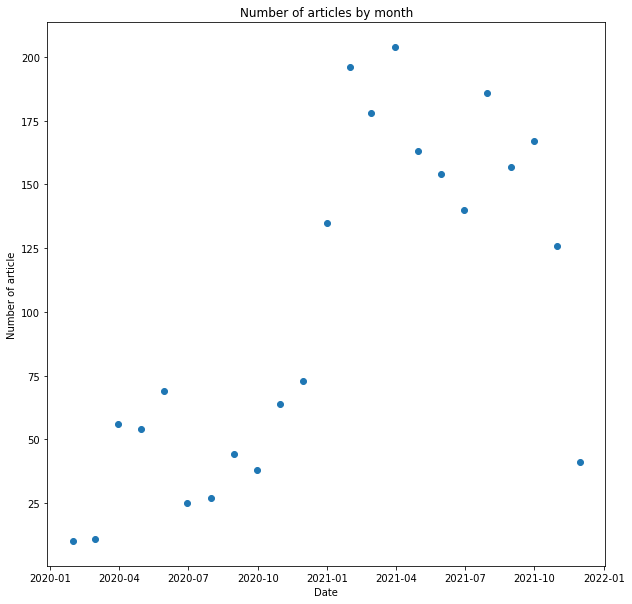

In [52]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df_monthly.index.values,
           df_monthly.values)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of article",
       title="Number of articles by month")

plt.show()

### NER

In [3]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’','j’','Retrouvez']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

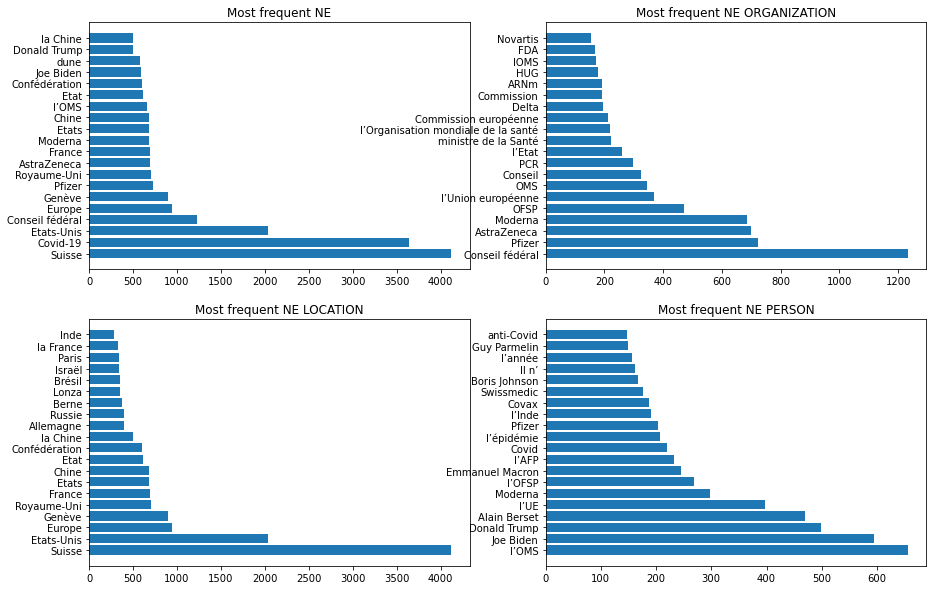

In [9]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')